# Conceptual

### Explain how k-fold cross-validation is implemented.

K-fold crossvalidation devides the dataset $D$ into $k$ parts/folds equally sized.
Then we perform the following steps:

1. For each of $i\in[1,...,k]$:

    1.1 Select the $i\text{th}$ dataset as validation set $val_i$.

    1.2. Select the rest of the dataset as training set $train_i = D \setminus val_i$.

    1.3. Fit the model $M_i$ on $train_i$.

    1.4. Calculate the validation error of $M_i$ using $val_i$ with an appropriate error term $E_i$

2. Aggregate the validataion errors of all k models to calculate the estimated test error: $CV_{(k)}=\frac{1}{k}\sum_{i=1}^K{E_i}$



### What are the advantages and disadvantages of k-fold crossvalidation relative to:
### The validation set approach?

The validation set approach is a special case of the k-fold crossvalidation where $k=1$. So there is no chance to validate the model against a variable dataset. Therefore, the k-fold crossvalidation (with $k>1$) can reduce the error in the test error rate coming from the selection of the validation set. This is because k-fold crossvalidation uses multiple combination of training and validation data, which gives the change to take the variance coming from all these combinations into account. In the validation set approach, where there is just one of those combinations, we better find a combination which is very representative to the variance in the data, in order to reduce the variance of our fitted model. However, k-fold crossvalidation does the just by using multiple of those combinations.

The same holds for the training data. With the validation set approach the model is never fitted against the datapoints in the validation set. So the learning algorithm has is no change to take these datapoints into account and we can not evaluate the impact of having these datapointsas training data instead of others. K-fold crossvalidation solves this problem, by considering k datasets with  k unequal but intersecting training set.

Since k-fold crossvalidation considers k datasets, there have to be k model fitted. This comes with a higher effort compared to the validation set approach, where only one model needs to be fit.

### LOOCV?

LOOCV is a special case of the k-fold crossvalidation where $k=n$ with a dataset having $n$ datapoints. In LOOCV each validation set comes with exactly one datapoint. This has an impact on the training data used for fitting. Therefore, in LOOCV the training data sets are larger than in k-fold crossvalidation, which is relevant when using small datasets. However, LOOCV works like k-fold crossvalidation. Based on this the computation of LOOCV comes with much more effort, since $k=n$. That means in general, the errort increases with increasing $k$. However, in linear regression we can use a shortcut for LOOCV.
In terms of model variance, k-fold crossvalidation performs better, because the training data used in the different models are less correlated than in LOOCV, where the training data sets are almost equal.

# Practical

I: Load the data file Auto.rda or Auto.csv

In [2]:
import pandas as pd

df = pd.read_csv('../data/ISLR/data/Auto.csv')

I: Display the number of predictors (including the response mpg ) and their names

In [8]:
predictors_and_response = df.columns.values[1::]

print(f'Predictors and response: {predictors_and_response}')
print(f'Numer: {len(predictors_and_response)}')

Predictors and response: ['mpg' 'cylinders' 'displacement' 'horsepower' 'weight' 'acceleration'
 'year' 'origin' 'name']
Numer: 9


I: Print a statistic summary of the predictors and the response medv

In [9]:
df[predictors_and_response].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


I: Display the number of data points

In [10]:
len(df)

392

I: Display the data in a table (subset of rows is sufficient)

In [11]:
df.head(20)

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,5,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,6,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,7,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,8,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,9,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,10,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


I: Compute the pairwise correlation of the predictors in the data set

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

/tmp/ipykernel_21495/3230154576.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correleation = df[predictors_and_response].corr()


<Axes: >

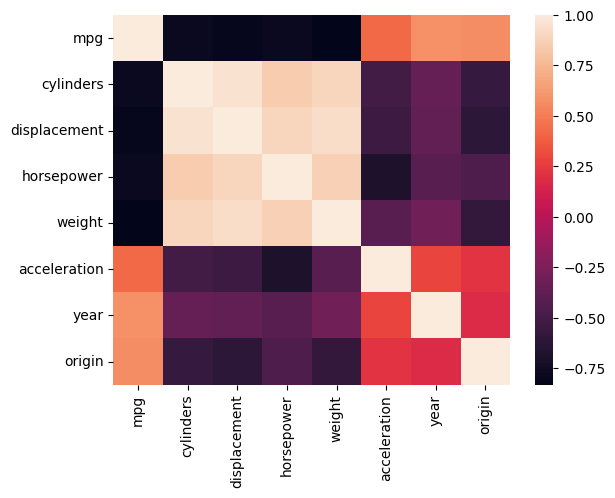

In [13]:
import seaborn as sns

correleation = df[predictors_and_response].corr()
print(correleation)

sns.heatmap(correleation)